In [2]:
import mentpy as mp
import torch
from torch.nn import Linear, Parameter
from torch_geometric.nn import MessagePassing

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [19]:
flowspace = mp.utils.FlowSpace(5, [0,1], [3,4])

In [21]:
dataset = []

for node in flowspace.flow_graph_space.nodes:
    if flowspace.flow_graph_space.nodes[node]['mbqc_circuit'] is not None:
        try: 
            lieagl =  mp.utils.lie_algebra.calculate_gens_lie_algebra(flowspace.flow_graph_space.nodes[node]['mbqc_circuit'])
            dataset.append((nx.adjacency_matrix(flowspace.flow_graph_space.nodes[node]['mbqc_circuit'].graph).todense(), np.array(lieagl.matrix)))
        except:
            pass

In [23]:
# store dataset in a file
torch.save(dataset, 'data/dataset.pt')

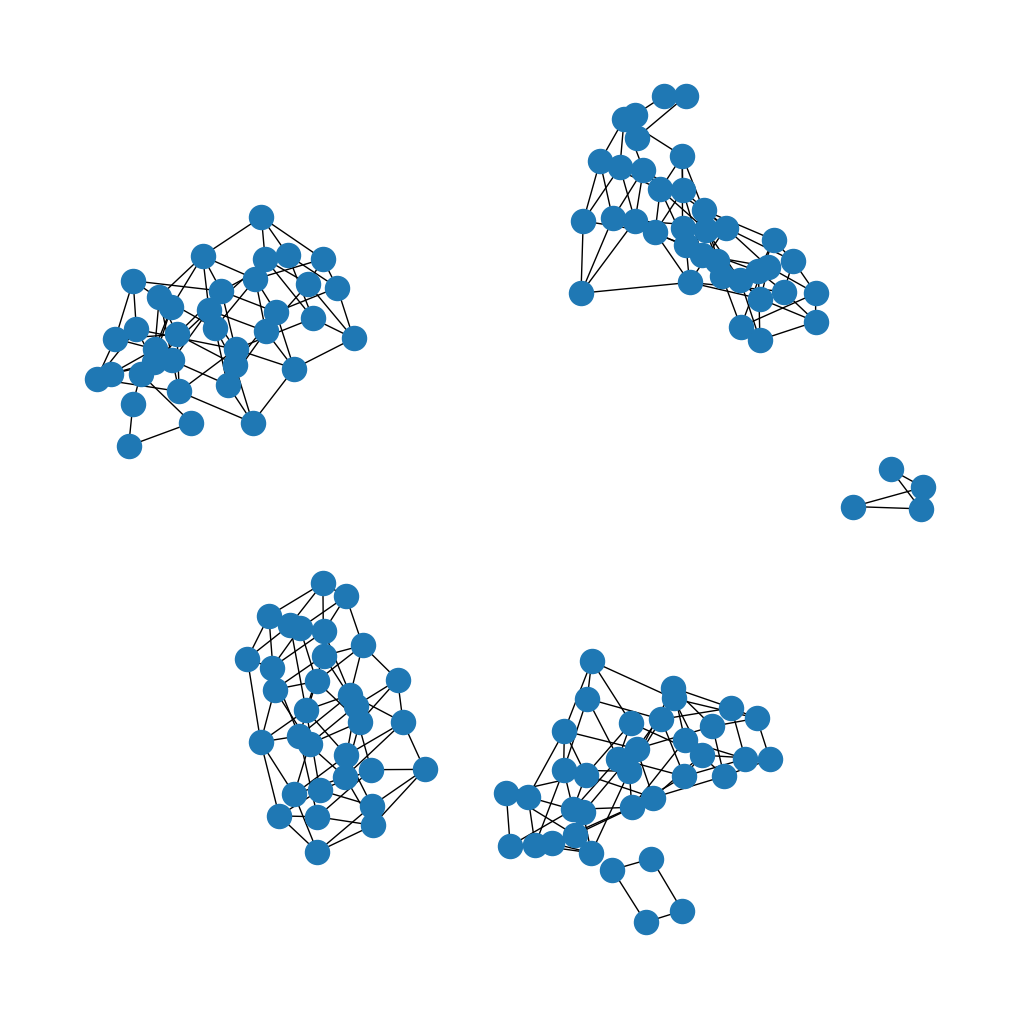

In [24]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(flowspace.flow_graph_space, k=0.2)
nx.draw(flowspace.flow_graph_space, pos=pos)